# Neuronale Netze von Grund auf
<br><br><img width=500 height=500 class="imgright" src="Images/neuronal_net.png"><br><br>

Hier eine sehr schematische Darstellung eines neuronalen Netzwerk, welches eine Sample mit 4 Features und einem Label von 3 (möglich sind 1 bis 5) richtig klassifiziert. Es gibt genau soviel Ausgänge des Netzwerkes wie es mögliche Kategorien gibt. Der Ausgang mit dem höchsten Ergebnis bestimmt die endgültige Zuordnung der Sample.

<br><br><img width=1500 height=1500 class="imgright" src="Images/Neuronales_Netzwerk1.png"><br><br>

Das Netzwerk besteht im Innern aus verketteten Perzeptronen. Wir werden diese ab jetzt Neuronen nennen in Anspielung auf die echten Zellen im Gehirn. Zur Erinnerung:<br><br><img width=1500 height=1500 class="imgright" src="Images/Perceptron.png"><br><br>

In einem Ausschnitt aus einem neuronalen Netz erkennen wir, daß die Neuronen in Schichten angeordnet sind, und daß jeweils alle Ausgänge der Neuronen der vorausgehenden Schicht (links) mit allen Eingängen der nächsten Schicht (rechts) verbunden sind. Dies nent man "Feedforward Netz", es sind natürlich auch andere Netzstrukturen möglich. Den Bias-Eingang haben wir aus Gründen der Übersichtlichkeit weggelassen. Die Verbindungen sind belegt mit den aktuellen Gewichten.
<br><br><img width=1500 height=1500 class="imgright" src="Images/Netz_innen.png"><br><br>

Wir werden jetzt ein kleines Netz aufbauen als Klassifikator für unser "konzentrische Kreise" Beispiel. Zur Erinnerung:<br><br><img width=600 height=600 class="imgright" src="Images/Kreise.png"><br><br>Die Neuronen bezeichnen wir einfach mit Grossbuchstaben. Als Aktivierungsfunktion für alle Neuronen wollen wir die Sigmoid-Funktion verwenden. Wir benötigen 2 Eingänge für die Features X-Koordinate des Punktes und Y-Koordinate. Dann lassen wir 2 innere Layer von jeweils 4 Neuronen folgen, solche inneren Schichten bezeichnet man normalerweise als "hidden layers", weil sie weder direkt den Eingang noch direkt den Ausgang bilden. Beim "deep learning" können wir viele solche inneren Schichten haben, deshalb das  "deep" in "deep learning". Warum 2 innere Schichten mit jeweils 4 Neuronen? Dies muß für jedes Netz in Abhängigkeit von der Komplexität des Problems, den Eingangswerten und den Hardware-Möglichkeiten abgestimmt und oft auch empirisch optimiert werden. Hier geht es aber nur um die Demonstration eines sehr kleinen Netzes und wir wollen auf die Auslegung nicht zuviele Gedanken verschwenden. Für den Ausgang nehmen wir nur ein Neuron "I". Dessen Aktivierungfunktion gibt ja ebenfalls nur Werte zwischen 0 und 1 zurück, wir wollen den Ausgangwert so definieren, dass er, wenn er unter .5 liegt, einer Klasse entspricht und sonst der anderen Klasse.


Hier also unser Netz, die Verbindungen sind zur Vereinfachung nicht beschriftet. Den Bias, den ja jedes Neuron hat, haben wir nur für das Neuron "E" und "I" gezeichnet, um die Abbildung nicht zu unübersichtlich zu machen.<br><br><img width=800 height=800 class="imgright" src="Images/Netz.png"><br><br>

Hier nun die Benennung aller Gewichte. Den Bias und sein Gewicht haben wir wieder nur exemplarisch für A,E und I eingezeichnet. Diese Gewichte wird das Netz beim Lernvorgang optimieren.<br><br><img width=1500 height=1500 class="imgright" src="Images/Benennungen.png"><br><br>

Wir können jetzt die Struktur des Netzes im Programm abbilden. <br> Die Neuronen speichern wir im neuronen_dict. Key ist der Bezeichner des Neurons, für den Wert haben wir jeweils eine Liste mit zwei Fliesskommaeinträgen. Der erste Eintrag entspricht der gewichteten Summe aller Eingänge des Neurons nach anwenden der Sigmoid-Funktion (am Anfang 0, da noch keine Eingänge aktiviert wurden). Den zweiten Eintrag setzen wir anfangs ebenfalls auf 0, wir brauchen ihn später, wenn das Netz lernt. Zur Erinnerung nochmals das Perzeptron.<img width=800 height=800 class="imgright" src="Images/Perceptron.png"><br> Wir arbeiten das Netz von links nach rechts durch, die Eingabewerte von X und Y oder von anderen Neuronen, sowie die Bias (als 1) werden mit den entsprechenden Gewichten multipliziert. Das Ergebnis wird durch die Sigmoid-Funktion geleitet und dieses Ergebnis wird, wie oben gesagt, im ersten Eintrag der Werteliste jedes Neurons gespeichert.<br><br>
Die Gewichte speichern wir im gewichte_dict, Key ist die oben dargestellte Benennung. Den Wert der Gewichte setzen wir anfänglich auf niedrige (positive oder negative) Fliesskommawerte. Macht man die Gewichte anfangs sehr unterschiedlich, kann es sein, daß das Netz einzelne Features zu sehr betont und lange braucht, um die Gewichte zu optimieren. Sind sie zu groß (positiv oder negativ), kann unsere Sigmoid-Aktivierungsfunktion sich sehr stark den Grenzwerten 0 und 1 nähern, kleine Änderungen der Gewichte haben dann praktisch keine Auswirkung mehr und deshalb wird das Netz sehr langsam oder gar nicht mehr lernen. 

Wir können sehen, daß die Pfeile für die Verbindungen die Abbildung des Netzes sehr komplizieren, dabei ist ja beim Betrachten der Layer klar, welches Neuron mit welchem verbunden ist, sodaß sich aus den Verbindungspfeilen keine zusätzlichen Informationen ergeben. Man tendiert daher dazu, sie wegzulassen und nur die Neuronen zu zeichen, wenn man ein Netz graphisch darstellt. NUn bauen wir unser Netz auf und speichern es in "the_net.pkl" mit dem Pickle - Modul. Wir fragen nach, aus welchem Bereich die Gewichte initial gesetzt werden sollen. 

In [4]:
import random
import pickle
neuronen_dict={"A":[0,0],"B":[0,0],"C":[0,0],"D":[0,0],"E":[0,0],"F":[0,0],"G":[0,0],"H":[0,0],"I":[0,0]}
bereich=float(input("aus welchem Bereich sollen die initialen Gewichte gesetzt werden? Plus und Minus, z.B. 0.02  "))

verbindungs_liste=['XA', 'XB', 'XC','XD','YA', 'YB', 'YC','YD', 'AE', 'AF', 'AG','AH','BE', 'BF', 'BG','BH',\
                   'CE', 'CF', 'CG','CH','DE', 'DF', 'DG','DH','EI','FI','GI','HI',\
                   'AA','BB','CC','DD','EE','FF','GG','HH','II']
gewichte_dict={}
for elem in verbindungs_liste:                   
    gewichte_dict[elem]=random.uniform(-bereich,bereich)
print(gewichte_dict) #Kontrollausdruck

with open("Data/the_net.pkl","wb") as fh:
    pickle.dump((neuronen_dict,gewichte_dict),fh) #gespeichert mit pickle

#with open("the_net.pkl","rb") as fh: # so holt man sie zurück
#    pickle.load(fh)
#print(neuronen_dict)
#print(gewichte_dict)
    

aus welchem Bereich sollen die initialen Gewichte gesetzt werden? Plus und Minus, z.B. 0.02  .04
{'XA': 0.020830885484208014, 'XB': -0.02119955089386495, 'XC': 0.01343014339876323, 'XD': -0.031141166288430243, 'YA': 0.0325404919163794, 'YB': -0.001990403261234508, 'YC': 0.015824915301176364, 'YD': -0.03331309274634716, 'AE': 0.010625687776529773, 'AF': -0.032480010200980555, 'AG': -0.03714327491287711, 'AH': -0.00811674240764216, 'BE': 0.0020067627656872103, 'BF': -0.016918512809031033, 'BG': -0.026097350669691773, 'BH': -0.029626746965465838, 'CE': 0.02960339869153785, 'CF': 0.02374492991070145, 'CG': 0.010763867056242667, 'CH': -0.0020971042329571907, 'DE': -0.016231902360926025, 'DF': 0.020799335751415862, 'DG': 0.03596514927041492, 'DH': -0.01154432200867074, 'EI': 0.015967462919008975, 'FI': -0.030955441036822205, 'GI': -0.03765953610815667, 'HI': -0.00856161570988978, 'AA': -0.018143643013927013, 'BB': -0.016717632480541197, 'CC': -0.02647329692510031, 'DD': 0.0289704283288846, '

Damit wäre das Netz vollständig beschrieben, wir können jetzt von den Eingängen bis zu den Ausgängen das Netz einmal vorwärts rechnen. Dies tun wir am Beispiel eines Circle Datensatzes mit 1000 Punkten als Trainingsdaten.

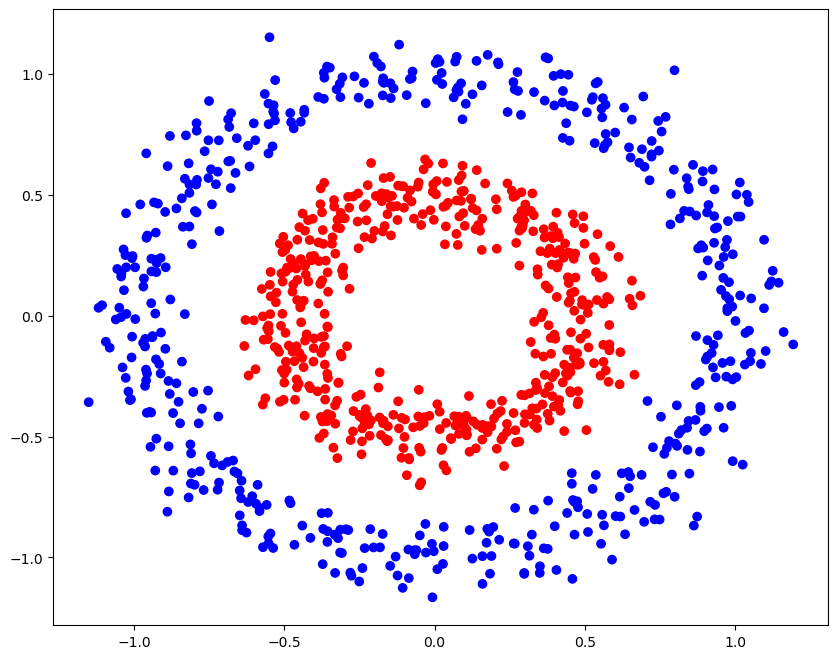

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

X, y = datasets.make_circles(n_samples=1000, factor=0.5, noise=0.08)

y.reshape(1000,1)
fig, ax = plt.subplots(figsize=(10,8))
plt.title="Trainingsdatensatz"
colormap=np.array(["blue","red"])
plt.scatter(X[:,0],X[:,1],c=colormap[y])

Accuracy: 0.499
Neuronen sind jetzt: {'A': [0.6580288528326047, 0], 'B': [0.6523194127507398, 0], 'C': [0.6536683963790374, 0], 'D': [0.66227852917947, 0], 'E': [0.6690186874409391, 0], 'F': [0.6552441709450645, 0], 'G': [0.6509476827596982, 0], 'H': [0.6583517660135625, 0], 'I': [0.6510066314538666, 0]}


Ausgabe des Netzes


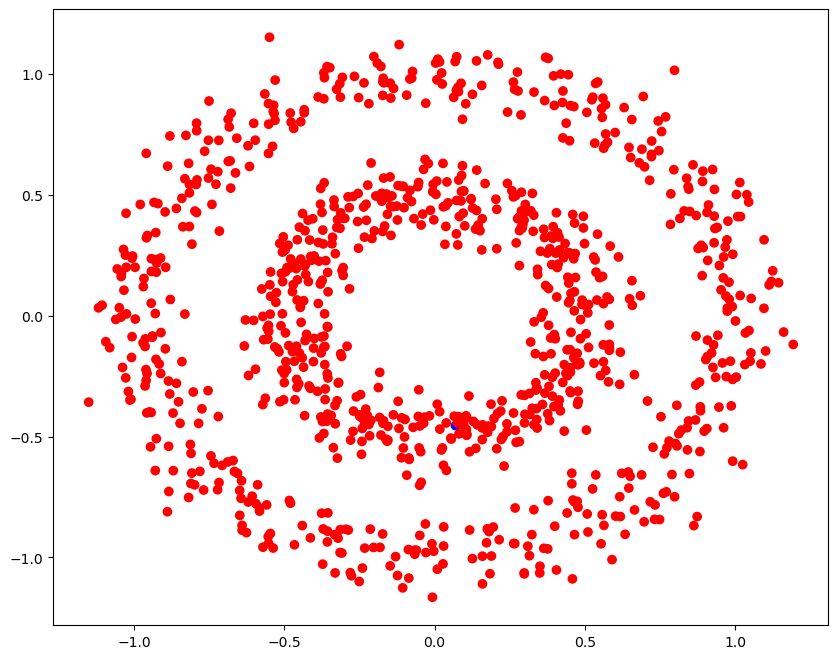

In [6]:

def sigmoid(x):
    if x<-10: 
        return 0.0 
    elif x>10:
        return 1
    return 1/(1+np.exp(-x))
reihenfolge=list("ABCDEFGHI")

def vorwärts(X,y): 
    """berechnet netz für einen Eingabedatensatz"""
    neuronen_dict=start    
    X_ein=X[0]
    Y_ein=X[1]    
    for neuron in reihenfolge:        
        neuronen_dict[neuron][0]+=gewichte_dict[neuron+neuron] #bias        
        if neuron in ["A","B","C","D"]:  #Eingänge              
            neuronen_dict[neuron][0]+=X_ein*gewichte_dict["X"+neuron]            
            neuronen_dict[neuron][0]+=Y_ein*gewichte_dict["Y"+neuron]
            neuronen_dict[neuron][0]=sigmoid(neuronen_dict[neuron][0]) 
            continue
        for gewichtsname,gewichtswert in gewichte_dict.items():
            if gewichtsname[1]==neuron and gewichtsname[0] not in ["X","Y"] and gewichtsname != neuron+neuron:                    
                neuronen_dict[neuron][0]+=neuronen_dict[gewichtsname[0]][0]*gewichtswert                
        neuronen_dict[neuron][0]=sigmoid(neuronen_dict[neuron][0])    
    res=0 if neuronen_dict["I"][0]<.5 else 1
    return res,y
    
with open("Data/the_net.pkl","rb") as fh: # so holt man sie zurück
    neuronen_dict,gewichte_dict=pickle.load(fh)

start=neuronen_dict
richtige,pred_labels=0,np.zeros(1000).astype(int)

for index in range(len(X)):   #Auswertung 
    pred_label,label=vorwärts(X[index],y[index]) #für alle Datensätze
    pred_labels[index]=pred_label
    if label==pred_label:
        richtige+=1
        
print(f"Accuracy: {richtige/len(y)}")
print(f"Neuronen sind jetzt: {neuronen_dict}")
print(f"\n\nAusgabe des Netzes")

pred_labels.reshape(1000,1)
fig, ax = plt.subplots(figsize=(10,8))
plt.title="Kategorizierung nach ein Duchlauf"
colormap=np.array(["blue","red"])
plt.scatter(X[:,0],X[:,1],c=colormap[pred_labels])


Unser Netzwerk gibt zunächst für alle Eingabedatensätze immer denselben Ausgabewert an. Es muß jetzt lernen. Wie soll das gehen?

Eine (wenn auch katastrophal ineffektive) Möglichkeit wäre die Folgende.<img width=800 height=800 class="imgright" src="Images/Katastrophe.png"><br>

Wir machen n Durchgänge durch alle Eingabedatensätze. Wir berechnen dann die Fehlersumme des Durchgangs.<br>
Jetzt verstellen wir <b>ein zufällig ausgewähltes Gewicht.</b><br>
Wenn das Ergebnis eines neuen kompletten Durchgangs mit allen Eingabedatensätzen besser ist als der Originaldurchgang, lassen wir das Gewicht verändert und gehen zum nächsten Durchgang, bis die n Durchgänge erreicht sind.<br>
Im anderen Fall verändern wir das Ausgangsgewicht in die andere Richtung vom Originalgewicht aus um denselben Betrag. Wir gehen dann auch hier zum nächsten Durchgang,  bis die n Durchgänge erreicht sind.<br>
<b>Wir benötigen also 2 * n Durchgänge und verstellen dabei m Gewichte. Dabei müssen wir das Netz für jeweils einen kompletten Eingabedatensatz durchlaufen. In unserem Fall sind das für m 1000 Einzeldatensätze.
Bei 10000 Durchgängen (n) und einer Datensatzlänge von 1000 (m) müssten wir also in unserem Fall 20.000.000 mal (2*m*n) das Netz durchlaufen.<br>
Wir möchten uns nun anschauen, was das in der Praxis bedeutet.

Hier die Entwicklung der Fehlersumme des Netzes für 10000 Durchgänge (das dauerte jeweils einige Minuten) mit den kompletten Datensätzen, also mit jeweils 1000 Punkten. Einmal wurden die Gewichte mit gleichverteilten Zufallszahlen im Bereich -.2 bis .2 und einmal mit -.5 bis .5 verstellt.<br><br><img width=800 height=800 class="imgright" src="Images/Katastrophenresults.png"><br>

Wir sehen, dass noch einige Fehler bleiben, beim stärkeren Verstellen der Gewichte mehr. Diese Kurve zeigt deutliche Schwingungen der Fehlersumme, weil die Verstellung der Gewichte am Ende, wenn das Netz schon einiges gelernt hat, zu gross ist. Wir verändern ja das ausgewählte Gewicht in die jeweilige Gegenrichtung, wenn der Versuch einer Verstellung schlechter ist als das Original. Diese dann durchgeführte Verstellung kann aber ebenfalls schlechter sein als das Original. Wenn wir bei noch höherem Zeitbedarf ein besseres Ergebnis erzielen wollten, müssten wir den Algorithmus so abändern, dass nur dann das Gewicht geändert wird, wenn der Verstellversuch ein besseres Ergebnis zeigt, sonst würde man weiter das alte Gewicht verwenden und dann einen neuen Versuch machen. Am Anfang ist die Kurve mit der höheren Verstellrate aber deutlich schneller im Optimieren. Am Besten würde man also die Verstellrate der Gewichte anpassen an die Grösse der Fehlersumme. Bei grossem Fehler viel und dann zunehmend weniger. Wir optmieren dann also die Verstellrate. Dieser Vorgang wird bei neuronalen Netzen aus den entsprechenden Bibliotheken durch die Wahl eines sogenannten Optimizers erledigt. Interessant ist noch die Entwicklung der Gewichte.

Insgesamt ist das Ergebnis gar nicht so schlecht, aber natürlich der Ablauf viel zu langsam. <b> So kann man ein neuronales Netz in der Praxis nicht lernen lassen. Das nächste Kapitel zeigt, wie es geht.